In [114]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [115]:
import pickle
root_path = '/Users/panyining/Downloads/A1_Dataset/'
data_name = 'datasets_2'
with open(root_path+data_name+'/large_train.pkl', 'rb') as f:
    large_train = pickle.load(f)
with open(root_path+data_name+'/test.pkl', 'rb') as f:
    test = pickle.load(f)
# print(data)
X_train, y_train = large_train['X'], large_train['Y']  # (32, 1)
X_test, y_test = test['X'], test['Y']

# 对test数据集按第一列的升序排列
test = np.concatenate((X_test, y_test), axis=1)
test2 = test[np.lexsort(test[:,::-1].T)]

1. 打印train和test数据

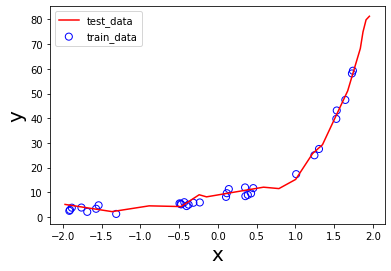

In [116]:
plt.scatter(X_train,y_train,facecolor="none", edgecolor="b", s=50, label="train_data")
# plt.scatter(X_test,y_test,facecolor="none", edgecolor="g", s=50, label="test_data")
plt.plot(test2[:,0],test2[:,1],c="r",label="test_data")
plt.ylabel("y",size=20)
plt.xlabel("x",size=20)
plt.legend()
plt.show()

2. 使用均方误差衡量损失函数:
$E(W)=\frac{1}{2} \sum_{n=1}^{N}\left(y\left(x_{n}, W\right)-t_{n}\right)^{2}$

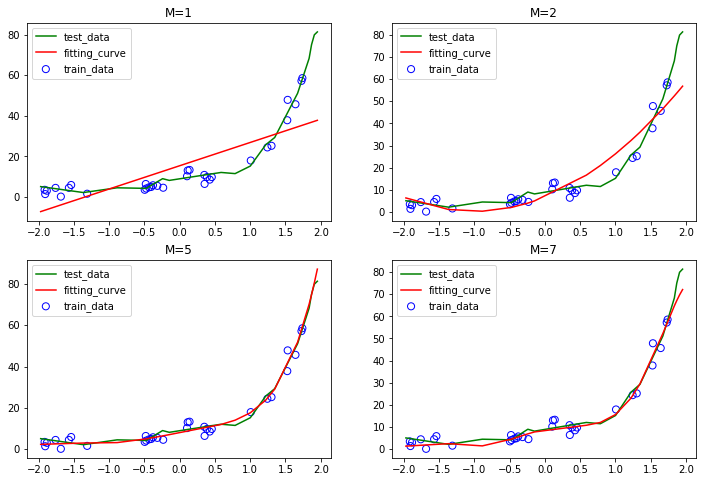

In [120]:
X_test2 = np.expand_dims(test2[:,0], 1)

fig = plt.figure(figsize=(12,8))
for i,order in enumerate([1,2,5,7]):  
    plt.subplot(2,2,i+1)

    poly = PolynomialFeatures(order)
    X_train_ploy = poly.fit_transform(X_train)
    X_test_ploy = poly.fit_transform(X_test2)
    
    lr = LinearRegression()
    lr.fit(X_train_ploy,y_train)
    y_pred = lr.predict(X_test_ploy)

    plt.scatter(X_train,y_train,facecolor="none", edgecolor="b", s=50, label="train_data")
    plt.plot(test2[:,0],test2[:,1],c="g",label="test_data")
    plt.plot(test2[:,0],y_pred,c="r",label="fitting_curve")
    plt.title("M={}".format(order))
    plt.legend()
plt.show()

3. 解决过拟合问题I：扩大数据集

当一个模型的复杂度给定了之后，数据规模增加能够有效的减轻模型的过拟合问题，所以这是一个防止模型过拟合的方式

4. 解决过拟合问题II：引入正则化

为误差函数增加一个惩罚项，使得多项式系数被有效的控制：
$\tilde{E}(x)=\frac{1}{2} \sum_{n=1}^{N}\left(y\left(x_{n}, W\right)-t_{n}\right)^{2}+\frac{\lambda}{2}\|W\|^{2}$

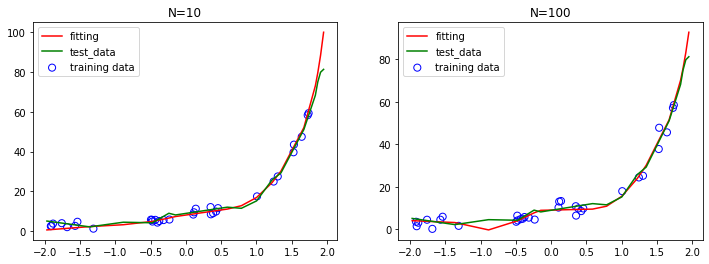

In [119]:
fig = plt.figure(figsize=(12,4))
for i,N in enumerate([10,100]):
    y_train += np.random.normal(scale=0.015*N, size=y_train.shape)
    
    plt.subplot(1,2,i+1)

    poly = PolynomialFeatures(9)
    X_train_ploy = poly.fit_transform(X_train)
    X_test_ploy = poly.fit_transform(X_test2)
    
    lr = LinearRegression()
    lr.fit(X_train_ploy,y_train)
    y_pred = lr.predict(X_test_ploy)

    plt.scatter(X_train,y_train,facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(test2[:,0],test2[:,1],c="g",label="test_data")
    plt.plot(X_test2,y_pred,c="r",label="fitting_curve")

    plt.title("N={}".format(N))
    plt.legend()
plt.show()

当$\lambda$过大的时候会过度抑制模型，所以根据模型复杂度来选择合适的$\lambda$